# Realtime Results Analysis
Created by Kevin Ta 2021.01.21


In [1]:
# Import relevant modules
import os
import glob
import time
from datetime import datetime

import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

(2488,)
(2488,)
(4908,)
(4908,)
(12143,)
(12143,)
(14626,)
(14626,)
(18246,)
(18246,)
(20713,)
(20713,)
(23118,)
(23118,)
(25624,)
(25624,)
(28152,)
(28152,)
(30648,)
(30648,)
(32580,)
(32580,)
(39747,)
(39747,)
(42344,)
(42344,)
(49429,)
(49429,)
(53031,)
(53031,)
(60053,)
(60053,)
(65752,)
(65752,)
(68080,)
(68080,)
(70643,)
(70643,)
(73634,)
(73634,)
(76019,)
(76019,)
(77958,)
(77958,)
(84826,)
(84826,)
(87132,)
(87132,)
(94018,)
(94018,)
(96582,)
(96582,)
(103470,)
(103470,)
(105879,)
(105879,)


Text(0.5, 1.0, 'Everyone')

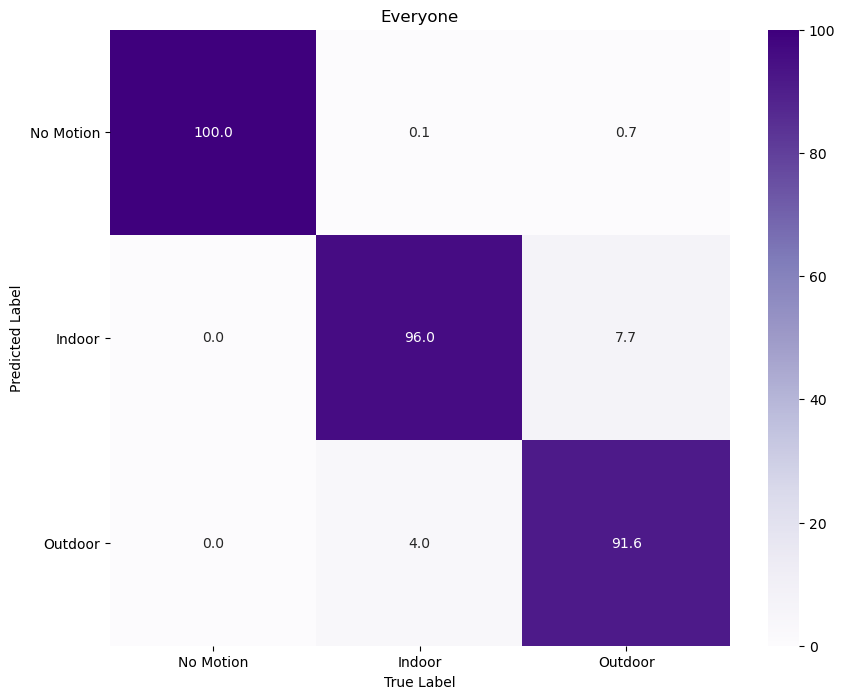

In [10]:
COUNT_ZERO = True

TERRAINS = ['Asphalt', 'Carpet', 'Concrete', 'Gravel', 'Grass', 'Linoleum', 'Sidewalk']
TERRAINS_R1 = ['No Motion','Indoor', 'Asphalt-Sidewalk', 'Grass', 'Gravel']
TERRAINS_R2 = ['No Motion','Indoor', 'Outdoor']

TEST_SET = [('Jamie', 'Concrete', 'Donut'),
            ('Jamie', 'Carpet', 'Donut'),
            ('Jamie', 'Linoleum', 'F8'),
            ('Jamie', 'Asphalt','Donut'),
            ('Jamie', 'Sidewalk','Straight'),
            ('Jamie', 'Grass','Donut'),
            ('Jamie', 'Gravel', 'Donut'),
            ('Keenan', 'Concrete', 'Donut'),
            ('Keenan', 'Carpet', 'Donut'),
            ('Keenan', 'Linoleum', 'Donut'),
            ('Keenan', 'Asphalt', 'Straight'),
            ('Keenan', 'Sidewalk', 'F8'),
            ('Keenan', 'Grass', 'Straight'),
            ('Keenan', 'Gravel', 'F8'),
            ('Kevin', 'Concrete', 'Donut'),
            ('Kevin', 'Carpet', 'F8'),
            ('Kevin', 'Linoleum', 'F8'),
            ('Kevin', 'Asphalt', 'Straight'),
            ('Kevin', 'Sidewalk', 'Donut'),
            ('Kevin', 'Grass', 'Straight'),
            ('Kevin', 'Gravel', 'Straight'),
            ('Mahsa', 'Concrete', 'Straight'),
            ('Mahsa', 'Carpet', 'F8'),
            ('Mahsa', 'Linoleum', 'Donut'),
            ('Mahsa', 'Asphalt', 'F8'),
            ('Mahsa', 'Sidewalk', 'Straight'),
            ('Mahsa', 'Grass', 'F8'),
            ('Mahsa', 'Gravel', 'Straight')]

"""
TEST_SET = [('Asphalt', 'Donut', 'Jamie'),
            ('Asphalt', 'Donut', 'Kevin'),
            ('Asphalt', 'F8', 'Mahsa'),
            ('Asphalt', 'Straight', 'Kevin'),
            ('Carpet', 'Donut', 'Jamie'),
            ('Carpet', 'F8', 'Keenan'),
            ('Carpet', 'F8', 'Kevin'),
            ('Carpet', 'F8', 'Mahsa'),
            ('Carpet', 'Straight', 'Mahsa'),
            ('Concrete', 'Donut', 'Kevin'),
            ('Concrete', 'F8', 'Keenan'),
            ('Concrete', 'F8', 'Mahsa'),
            ('Concrete', 'Straight', 'Mahsa'),
            ('Grass', 'Donut', 'Mahsa'),
            ('Grass', 'F8', 'Mahsa'),
            ('Grass', 'Straight', 'Jamie'),
            ('Grass', 'Straight', 'Keenan'),
            ('Grass', 'Straight', 'Kevin'),
            ('Gravel', 'Donut', 'Keenan'),
            ('Gravel', 'Donut', 'Kevin'),
            ('Linoleum', 'Donut', 'Jamie'),
            ('Linoleum', 'F8', 'Keenan'),
            ('Linoleum', 'Straight', 'Jamie'),
            ('Linoleum', 'Straight', 'Kevin'),
            ('Sidewalk', 'Donut', 'Kevin'),
            ('Sidewalk', 'F8', 'Kevin'),
            ('Sidewalk', 'Straight', 'Keenan'),
            ('Sidewalk', 'Straight', 'Kevin'),]
"""

PERSON = 'Everyone'

#TEST_SET = [item for i, item in enumerate(TEST_SET) if PERSON in item]

nonzero = 0

current_path = os.getcwd()

y_true = np.array([])
y_pred = np.array([])
timeDiffs = np.array([])

for dataset in TEST_SET:

    data = pd.read_csv(os.path.join('2021-Results', '200ms-6050-{}-{}-{}.csv'.format(dataset[1], dataset[2], dataset[0])))
    
    y_pred_temp = np.trim_zeros(data['RF Time'].to_numpy(dtype=np.int8))
    y_true_temp = data['True Label'].to_numpy(dtype=np.int8)
    timeDiffs_temp = np.diff(data['Time'].to_numpy())
    nonzero += len(y_true_temp) - len(y_pred_temp)
    
    y_true = np.append(y_true, y_true_temp[0:len(y_pred_temp)])
    y_pred = np.append(y_pred, y_pred_temp)
    timeDiffs = np.append(timeDiffs, timeDiffs_temp)
    
    print(y_true.shape)
    print(y_pred.shape)

if COUNT_ZERO:
    y_true = np.append(y_true, np.zeros(nonzero))
    y_pred = np.append(y_pred, np.zeros(nonzero))

cmat = confusion_matrix(y_pred, y_true)

plt.figure(figsize=(10,8))
sns.heatmap(cmat/(cmat.sum(axis=0)+0.01)*100, 
            annot=cmat/(cmat.sum(axis=0)+0.01)*100, 
            xticklabels=TERRAINS_R2, yticklabels=TERRAINS_R2, fmt='.1f', cmap='Purples', vmin = 0, vmax=100)
plt.yticks(rotation=0)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title(PERSON)


In [11]:
print("Accuracy Score:          {:10.2f}%".format(100*accuracy_score(y_true,y_pred)))
print("Balanced Accuracy Score: {:10.2f}%".format(100*balanced_accuracy_score(y_true,y_pred)))
print("F1 Score (Macro):        {:10.2f}%".format(100*f1_score(y_true,y_pred, average='macro')))

print('F1 Score (Individual):')
print(f1_score(y_true,y_pred, average=None))

Accuracy Score:               94.09%
Balanced Accuracy Score:      95.85%
F1 Score (Macro):             95.06%
F1 Score (Individual):
[0.97756174 0.9335729  0.94053714]


In [12]:
FILTER = [item for i, item in enumerate(TEST_SET) if 'Mahsa' in item]
print('Mahsa:  {:4}'.format(len(FILTER)))
FILTER = [item for i, item in enumerate(TEST_SET) if 'Jamie' in item]
print('Jamie:  {:4}'.format(len(FILTER)))
FILTER = [item for i, item in enumerate(TEST_SET) if 'Kevin' in item]
print('Kevin:  {:4}'.format(len(FILTER)))
FILTER = [item for i, item in enumerate(TEST_SET) if 'Keenan' in item]
print('Keenan: {:4}'.format(len(FILTER)))

Mahsa:     7
Jamie:     7
Kevin:     7
Keenan:    7


In [14]:
FILTER = [item for i, item in enumerate(TEST_SET) if 'Asphalt' in item]
print('Asphalt:   {:4}'.format(len(FILTER)))
FILTER = [item for i, item in enumerate(TEST_SET) if 'Carpet' in item]
print('Carpet:    {:4}'.format(len(FILTER)))
FILTER = [item for i, item in enumerate(TEST_SET) if 'Concrete' in item]
print('Concrete:  {:4}'.format(len(FILTER)))
FILTER = [item for i, item in enumerate(TEST_SET) if 'Grass' in item]
print('Grass:     {:4}'.format(len(FILTER)))
FILTER = [item for i, item in enumerate(TEST_SET) if 'Gravel' in item]
print('Gravel:    {:4}'.format(len(FILTER)))
FILTER = [item for i, item in enumerate(TEST_SET) if 'Linoleum' in item]
print('Linoleum:  {:4}'.format(len(FILTER)))
FILTER = [item for i, item in enumerate(TEST_SET) if 'Sidewalk' in item]
print('Sidewalk:  {:4}'.format(len(FILTER)))

Asphalt:      4
Carpet:       4
Concrete:     4
Grass:        4
Gravel:       4
Linoleum:     4
Sidewalk:     4


In [6]:
FILTER = [item for i, item in enumerate(TEST_SET) if 'Donut' in item]
print('Donut:    {:4}'.format(len(FILTER)))
FILTER = [item for i, item in enumerate(TEST_SET) if 'F8' in item]
print('Figure 8: {:4}'.format(len(FILTER)))
FILTER = [item for i, item in enumerate(TEST_SET) if 'Straight' in item]
print('Straight: {:4}'.format(len(FILTER)))

Donut:      11
Figure 8:    8
Straight:    9


In [15]:
from joblib import load, dump

performance = load(os.path.join('2021-Results', 'performance.joblib'))

for item in performance:
    print("{:<40}: {:>10.3} ms".format(item, 1000*performance[item][1]/performance[item][0]))

Concrete-Donut-Jamie-Classification     :       24.0 ms
Carpet-Donut-Jamie-Classification       :       24.0 ms
Linoleum-F8-Jamie-Classification        :       24.3 ms
Asphalt-Donut-Jamie-Classification      :       24.6 ms
Sidewalk-Straight-Jamie-Classification  :       24.9 ms
Grass-Donut-Jamie-Classification        :       24.9 ms
Gravel-Donut-Jamie-Classification       :       25.0 ms
Concrete-Donut-Keenan-Classification    :       25.2 ms
Carpet-Donut-Keenan-Classification      :       25.1 ms
Linoleum-Donut-Keenan-Classification    :       25.2 ms
Asphalt-Straight-Keenan-Classification  :       25.8 ms
Sidewalk-F8-Keenan-Classification       :       25.6 ms
Grass-Straight-Keenan-Classification    :       25.7 ms
Gravel-F8-Keenan-Classification         :       25.9 ms
Concrete-Donut-Kevin-Classification     :       25.9 ms
Carpet-F8-Kevin-Classification          :       26.0 ms
Linoleum-F8-Kevin-Classification        :       26.0 ms
Asphalt-Straight-Kevin-Classification   :       

In [8]:
print(1000*np.mean(timeDiffs))
print(1000*np.std(timeDiffs))

25.58009039747726
3.0226012649444147


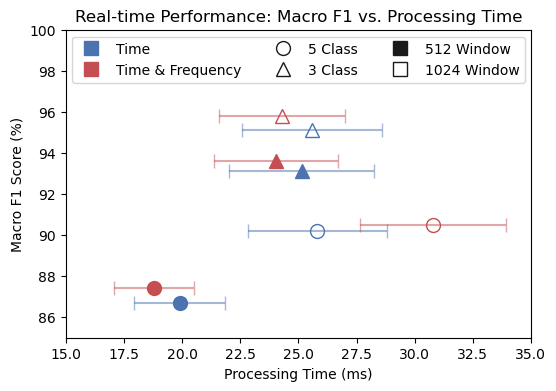

In [16]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

dataDetails = [
    {'Features': 'Time', 'Window Size':  512, 'Classes': 5, 'F1':  86.7,'Mean': 19.90,'St.D.': 1.95},
    {'Features': 'Time', 'Window Size': 1024, 'Classes': 5, 'F1':  90.2, 'Mean': 25.82,'St.D.': 3.00},
    {'Features': 'Time', 'Window Size':  512, 'Classes': 3, 'F1':  93.1, 'Mean': 25.14,'St.D.': 3.12},
    {'Features': 'Time', 'Window Size': 1024, 'Classes': 3, 'F1':  95.1, 'Mean': 25.58,'St.D.': 3.02},
    {'Features': 'Time & Frequency', 'Window Size':  512, 'Classes': 5, 'F1':  87.4, 'Mean': 18.79,'St.D.': 1.71},
    {'Features': 'Time & Frequency', 'Window Size': 1024, 'Classes': 5, 'F1':  90.5, 'Mean': 30.77,'St.D.': 3.14},
    {'Features': 'Time & Frequency', 'Window Size':  512, 'Classes': 3, 'F1':  93.6, 'Mean': 24.04,'St.D.': 2.68},
    {'Features': 'Time & Frequency', 'Window Size': 1024, 'Classes': 3, 'F1':  95.8, 'Mean': 24.30,'St.D.': 2.70},
]

colour = {'Time': 'b', 'Time & Frequency': 'r'}
shape = {5: 'o', 3:'^'}
fill = {512: 'full', 1024: 'none'}

fig = plt.figure(figsize=(6,4))
plt.xlim([15,35])
plt.ylim([85,100])

for item in dataDetails:
    col = colour[item['Features']]
    sha = shape[item['Classes']]
    fi = fill[item['Window Size']]
    plt.errorbar(item['Mean'], item['F1'], xerr = item['St.D.'], ecolor = col, capsize = 5, alpha = 0.5)
    plt.plot(item['Mean'], item['F1'], '{}{}'.format(col, sha), fillstyle=fi, markersize = 10)
plt.title('Real-time Performance: Macro F1 vs. Processing Time')
plt.ylabel('Macro F1 Score (%)')
plt.xlabel('Processing Time (ms)')
legend_elements = [
    mpl.lines.Line2D([0], [0], marker = 's', color = 'none', fillstyle = 'full', markeredgecolor = 'b', markerfacecolor = 'b', label = 'Time', markersize = 10),
    mpl.lines.Line2D([0], [0], marker = 's', color = 'none', fillstyle = 'full', markeredgecolor = 'r', markerfacecolor = 'r', label = 'Time & Frequency', markersize = 10),
    mpl.lines.Line2D([0], [0], marker = 'o', color = 'none', fillstyle = 'none', markeredgecolor = 'k', markerfacecolor = 'k', label = '5 Class', markersize = 10),
    mpl.lines.Line2D([0], [0], marker = '^', color = 'none', fillstyle = 'none', markeredgecolor = 'k', markerfacecolor = 'k', label = '3 Class', markersize = 10),
    mpl.lines.Line2D([0], [0], marker = 's', color = 'none', fillstyle = 'full', markeredgecolor = 'k', markerfacecolor = 'k', label = '512 Window', markersize = 10),
    mpl.lines.Line2D([0], [0], marker = 's', color = 'none', fillstyle = 'none', markeredgecolor = 'k', markerfacecolor = 'k', label = '1024 Window', markersize = 10),]
plt.legend(handles=legend_elements, ncol=3, loc = 'upper center')